## MOVIE RATINGS ANALYSIS USING SEABORN

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
movies = pd.read_csv(r'C:\Users\91939\Desktop\AI&DS\19thAug\Movie-Rating.csv')

In [3]:
movies

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [4]:
len(movies)

559

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [6]:
movies.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [7]:
movies.shape

(559, 6)

In [8]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.tail()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009
558,Zookeeper,Comedy,14,42,80,2011


In [10]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [11]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating','BudgetMillions','Year']

In [12]:
movies.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions',
       'Year'],
      dtype='object')

In [13]:
movies.isnull()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
554,False,False,False,False,False,False
555,False,False,False,False,False,False
556,False,False,False,False,False,False
557,False,False,False,False,False,False


In [14]:
movies.isnull().all()

Film              False
Genre             False
CriticRating      False
AudienceRating    False
BudgetMillions    False
Year              False
dtype: bool

In [15]:
movies.isnull().all().all()

False

In [16]:
movies.Film = movies.Film.astype('category')

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 43.6+ KB


In [18]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')


In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [20]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [21]:
import warnings
warnings.filterwarnings('ignore')

### JOINTPLOT

Draw a plot of two variables with bivariate and univariate graphs.


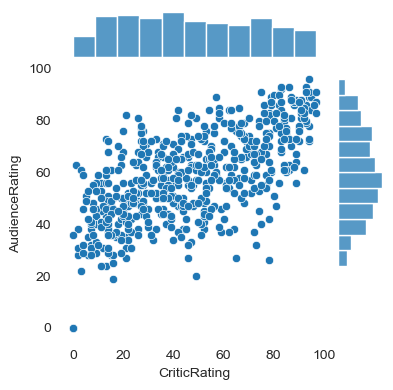

In [22]:
sns.set_style('dark', {'axes.facecolor': 'white'})
j=sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', height=4)

<Axes: xlabel='AudienceRating'>

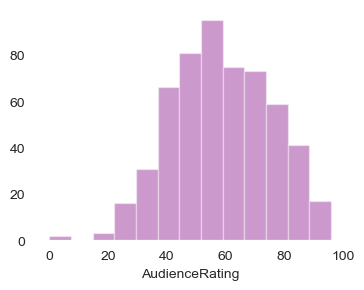

In [23]:
y=movies['AudienceRating']
plt.figure(figsize=(4,3))
sns.distplot(y,kde=False,bins=13,color='purple')

<Axes: xlabel='CriticRating'>

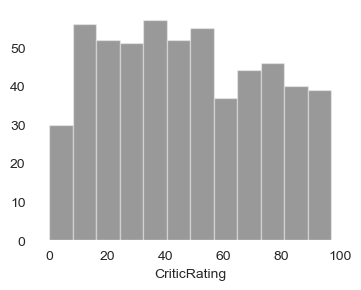

In [24]:
y=movies['CriticRating']
plt.figure(figsize=(4,3))
sns.distplot(y,kde=False,color='k',bins=12)

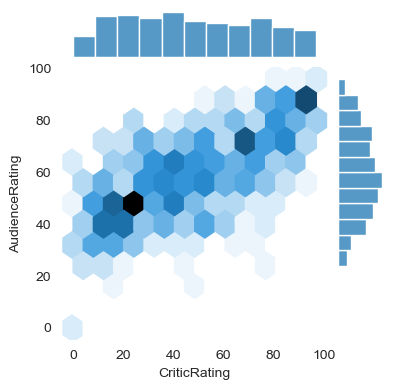

In [25]:
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating',kind='hex',height=4)

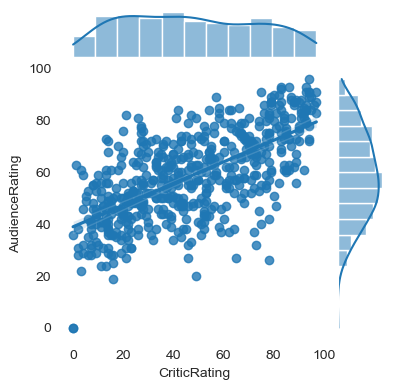

In [26]:
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating',kind = 'reg',height=4)

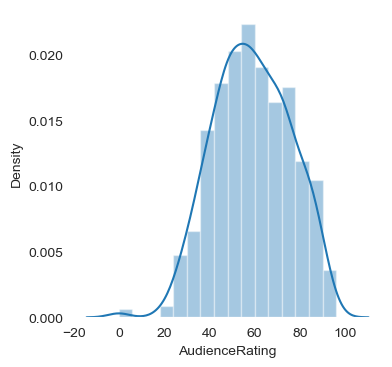

In [27]:
plt.figure(figsize=(4,4))
m1 = sns.distplot(movies['AudienceRating'])

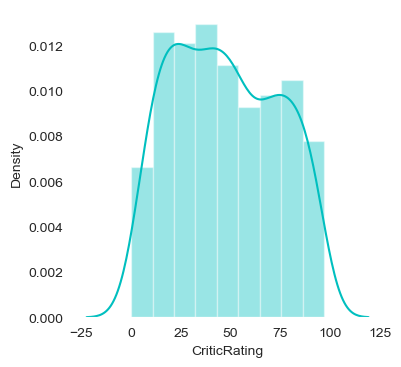

In [28]:
plt.figure(figsize=(4,4))
m1 = sns.distplot(movies['CriticRating'],color='c')

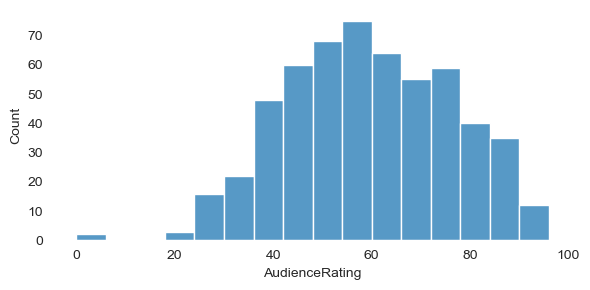

In [29]:
m1 = sns.displot(movies['AudienceRating'],height=3,aspect=2)

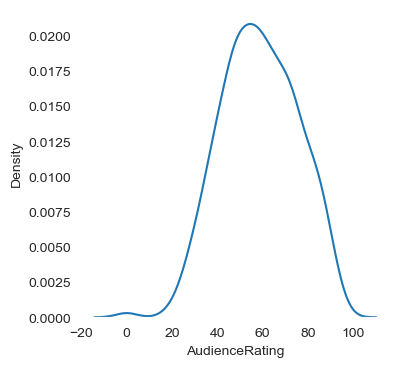

In [30]:
plt.figure(figsize=(4,4))
m1 = sns.kdeplot(movies['AudienceRating'])

In [31]:
sns.set_style('darkgrid')

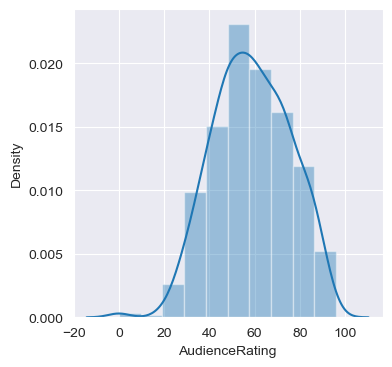

In [32]:
plt.figure(figsize=(4,4))
m1 = sns.distplot(movies['AudienceRating'],bins=10)

In [33]:
sns.set_style('whitegrid')

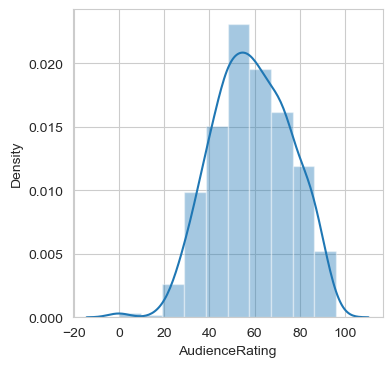

In [34]:
plt.figure(figsize=(4,4))
m1 = sns.distplot(movies['AudienceRating'],bins=10)

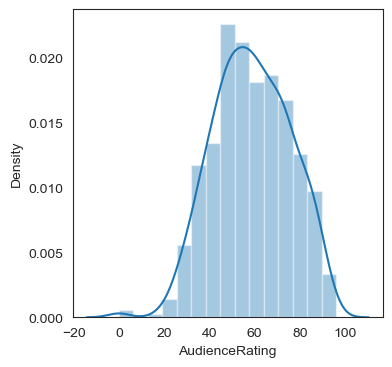

In [35]:
sns.set_style('white')
plt.figure(figsize=(4,4))
m1 = sns.distplot(movies['AudienceRating'],bins=15)

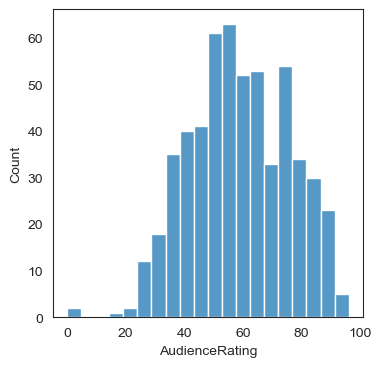

In [36]:
plt.figure(figsize=(4,4))
n1 = sns.histplot(movies['AudienceRating'],bins=20) #normal distribution & called as bell curve

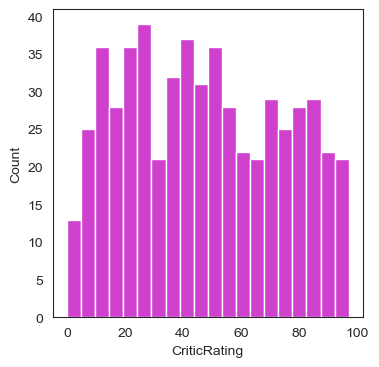

In [37]:
plt.figure(figsize=(4,4))
n1 = sns.histplot(movies['CriticRating'],bins=20,color='m')#uniform distribution

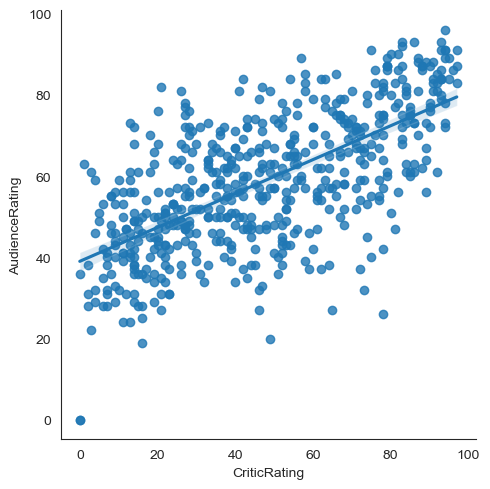

In [38]:
sns.lmplot(data = movies, x = 'CriticRating',y = 'AudienceRating')

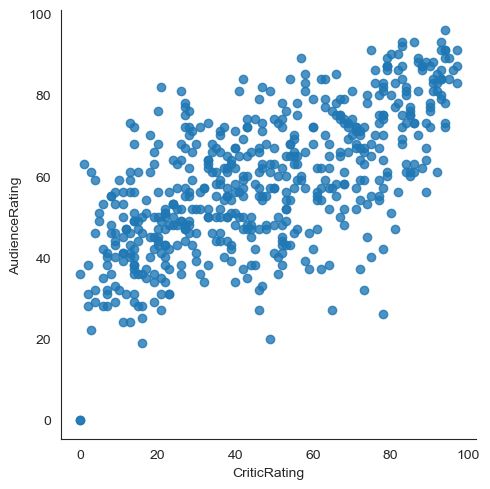

In [39]:
sns.lmplot(data = movies, x = 'CriticRating',y = 'AudienceRating',fit_reg = False)

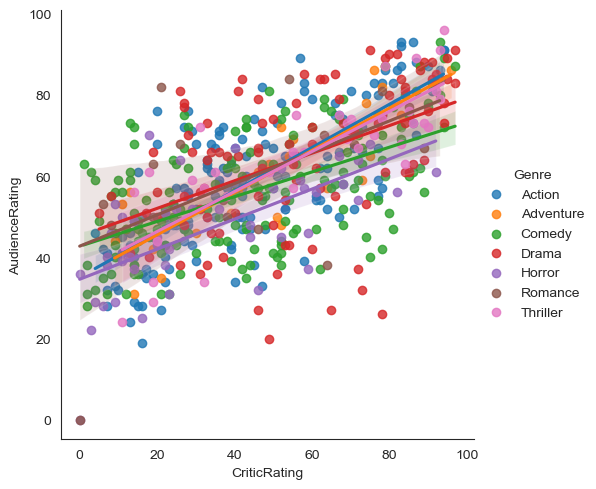

In [40]:
sns.lmplot(data = movies, x = 'CriticRating',y = 'AudienceRating',fit_reg = True,hue = 'Genre')

In [41]:
movies.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions',
       'Year'],
      dtype='object')

In [42]:
movies['BudgetMillions'].unique()

array([  8, 105,  20,  18, 200,  30,  32,  28,  35,   7,  19,  45,  10,
        40,  15, 100,   5,  78, 237,  21,  70,  17,  80,   4, 150,  13,
        61,  68,  33,  26,  42,   2,  55,  37, 140,  85,   6,  38, 125,
        25,  90,  60, 163,  50,  58,  69,  75, 175,  31, 130,  24,   1,
        73,  52, 110,   0,  53, 112,  16,  36,  12, 250,  83,  11, 160,
       185, 186,  79,  47, 117,  27,  22,  66, 145,  56,   3,  95, 300,
       230,  48,  93,  39, 120, 258,  65,  82,  29,  51,  41, 155,  14,
       180, 138,  62,  59,   9, 195, 210, 170], dtype=int64)

In [43]:
movies['BudgetMillions'].nunique()

99

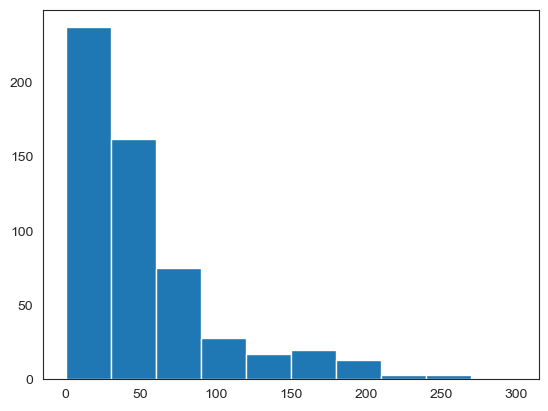

In [44]:
plt.hist(movies.BudgetMillions)
plt.show()

In [45]:
movies['Genre'].unique()

['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance', 'Thriller']
Categories (7, object): ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']

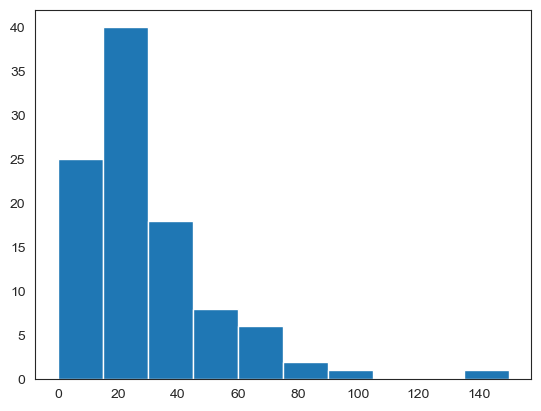

In [46]:
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions) # (histogram) showing how frequently different budget ranges (in millions) appear for drama movies in the movies DataFrame.
plt.show()

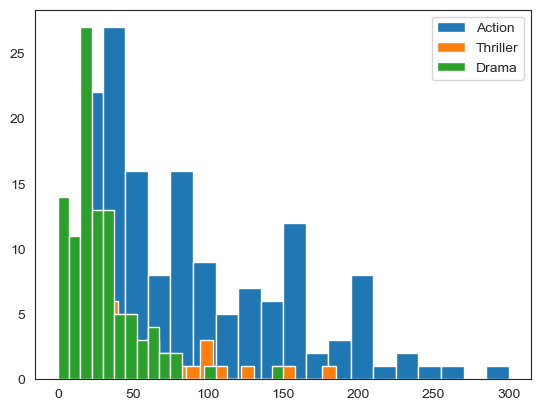

In [47]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins = 20,label='Action')
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 20,label='Thriller')
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 20,label='Drama')
plt.legend()
plt.show()  

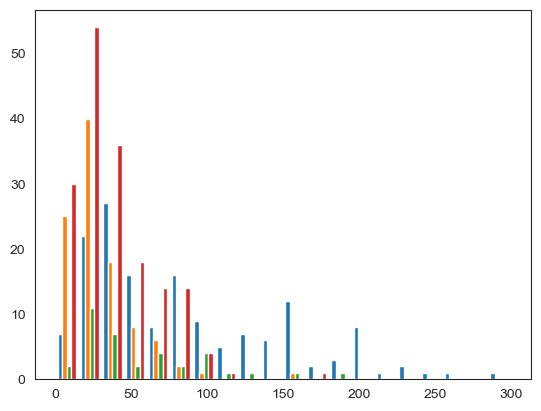

In [48]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
          movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Thriller'].BudgetMillions, \
          movies[movies.Genre == 'Comedy'].BudgetMillions],
         bins = 20, stacked = False)
plt.show()  

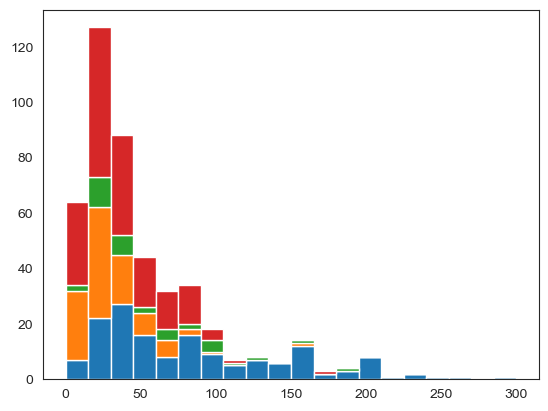

In [49]:
# Below plots are stacked histogram becuase overlaped
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
          movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Thriller'].BudgetMillions, \
          movies[movies.Genre == 'Comedy'].BudgetMillions],
         bins = 20, stacked = True)
plt.show()  

In [50]:
# if you have 100 categories you cannot copy & paste all the things

for gen in movies.Genre.unique():
    print(gen)

Comedy
Adventure
Action
Horror
Drama
Romance
Thriller


In [51]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


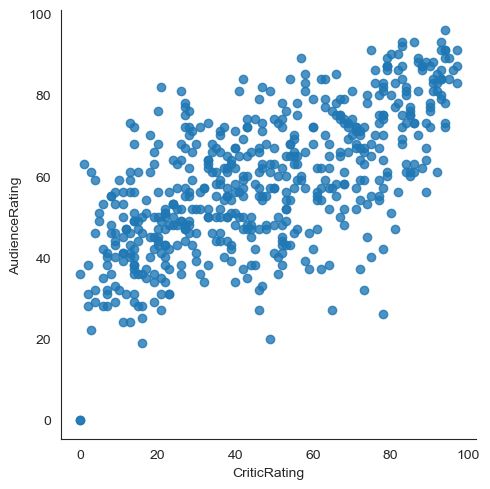

In [52]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False)


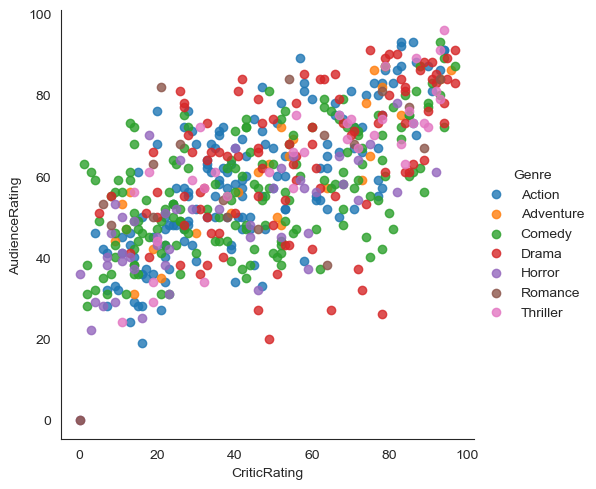

In [53]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False, hue = 'Genre')

In [54]:
sns.set_style('dark')

height : scalar
    Height (in inches) of each facet. See also: ``aspect``.    
aspect : scalar
    Aspect ratio of each facet, so that ``aspect * height`` gives the width
    of each facet in inches.   

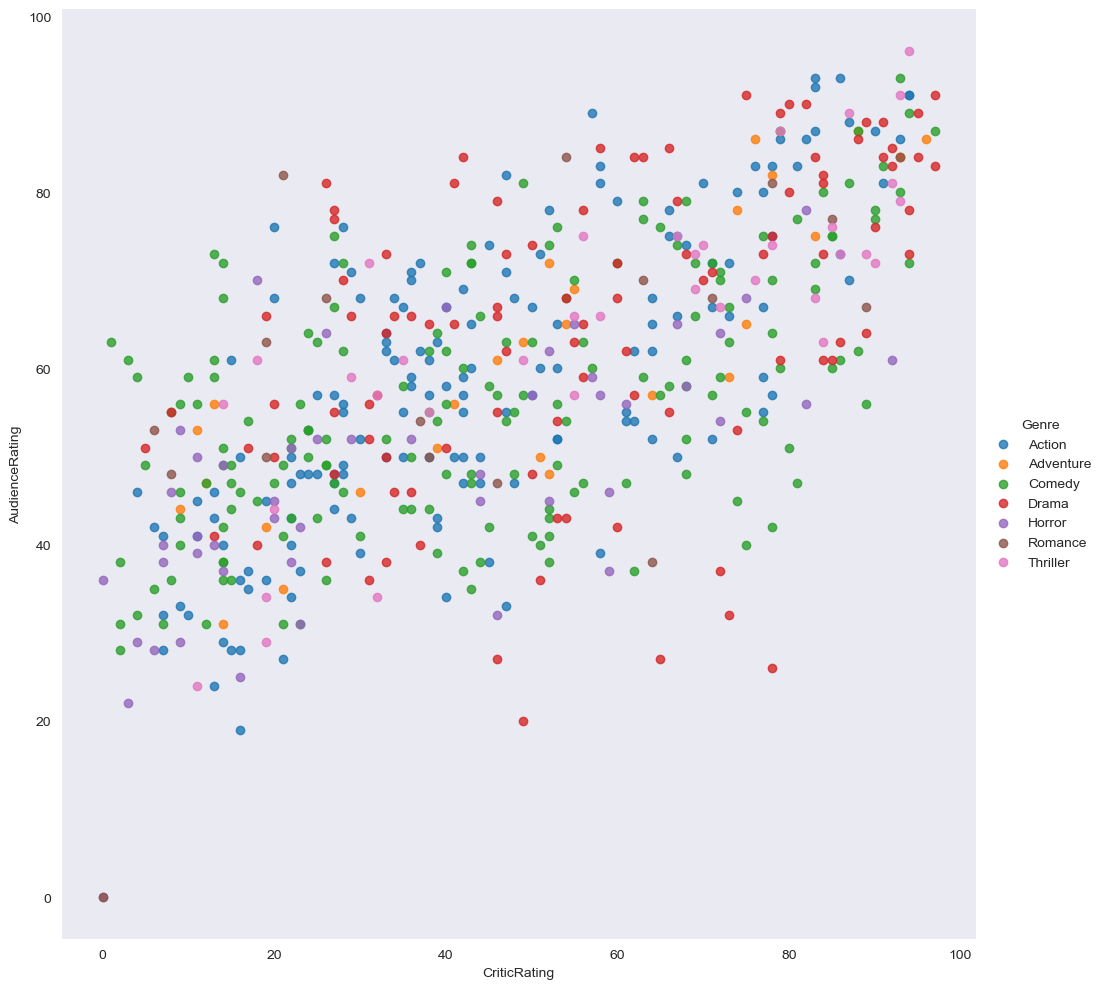

In [55]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False, hue = 'Genre', height = 10,aspect=1) 


### KDE Plot

Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the
distribution of observations in a dataset, analogous to a histogram. KDE
represents the data using a continuous probability density curve in one or
more dimensions.

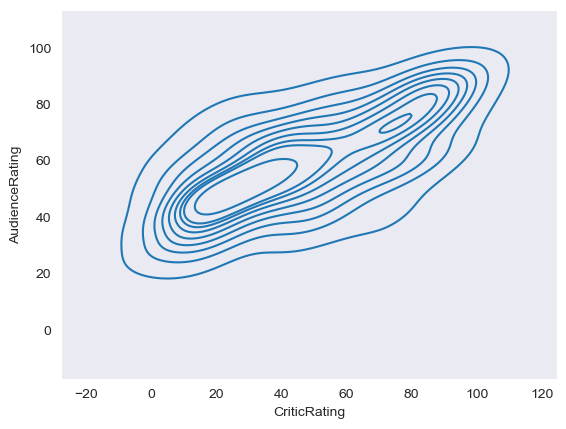

In [56]:
k1 = sns.kdeplot(x='CriticRating',y='AudienceRating',data = movies)
# where do u find more density and how density is distibuted across from the the chat 
# center point is kernal this is calld KDE & insteade of dots it visualize like this
# we can able to clearly see the spread at the audience ratings

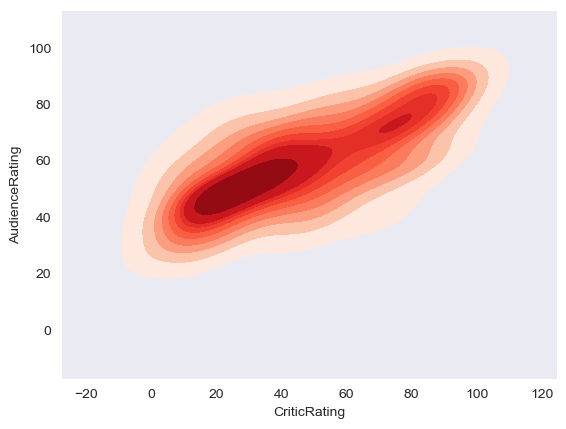

In [57]:
k1 = sns.kdeplot(x='CriticRating',y='AudienceRating',data = movies,shade = True,shade_lowest=False,cmap='Reds')

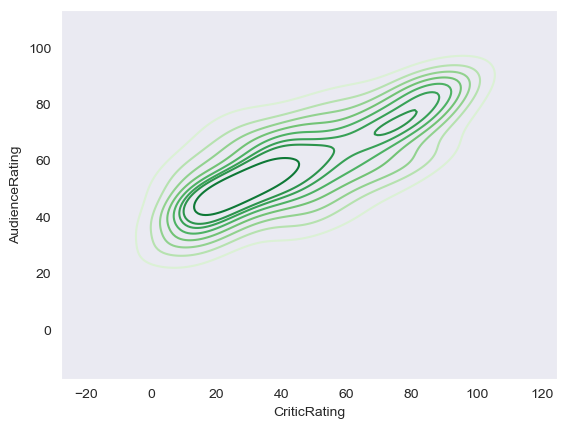

In [58]:
k1 = sns.kdeplot(x='CriticRating',y='AudienceRating',data = movies,shade = False,shade_lowest=True,cmap='Greens')

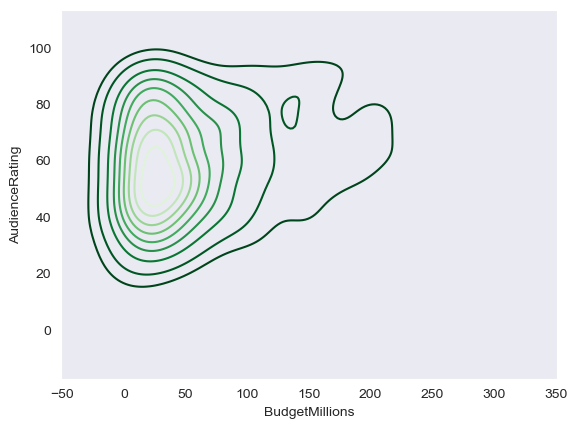

In [59]:
k2 = sns.kdeplot(x='BudgetMillions',y='AudienceRating',data = movies,shade_lowest=False,cmap='Greens_r')

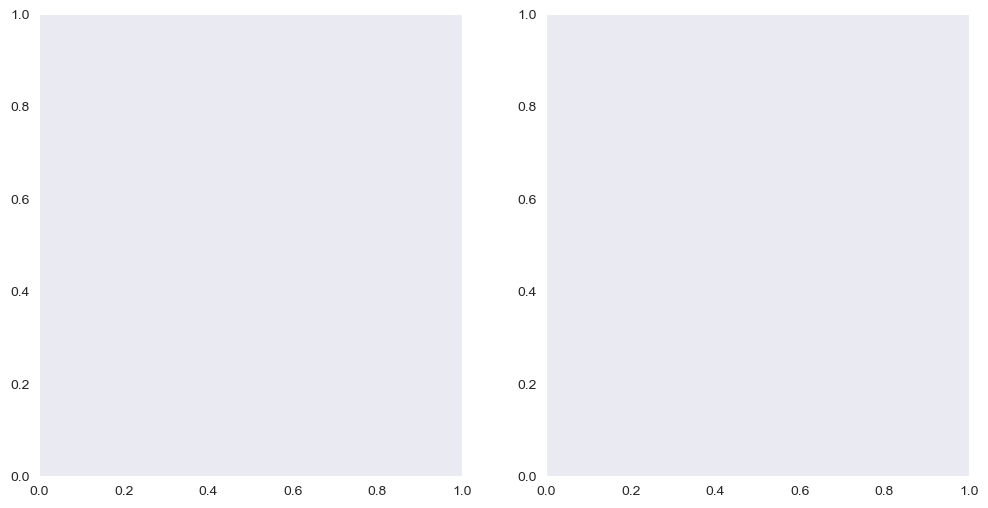

In [60]:
f, ax = plt.subplots(1,2, figsize =(12,6))
#f, ax = plt.subplots(3,3, figsize =(12,6))

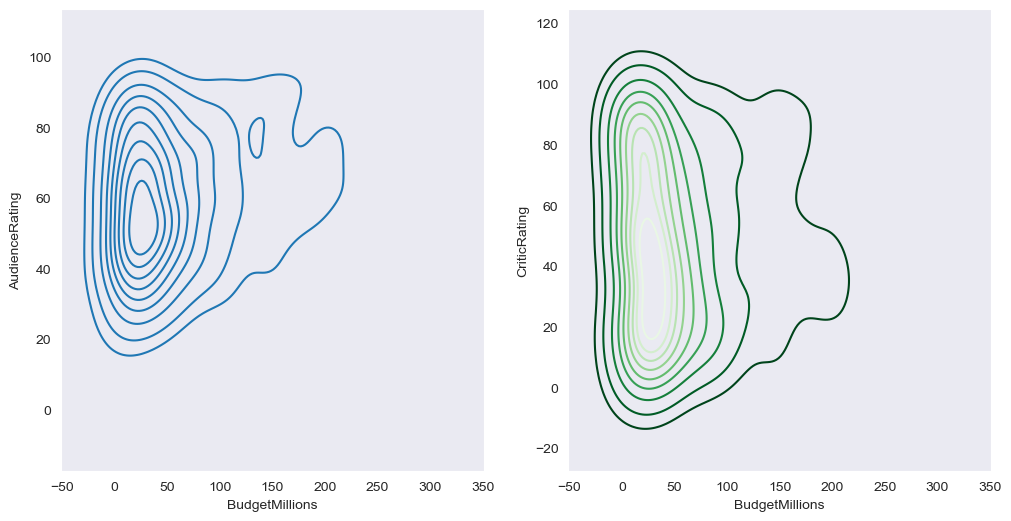

In [61]:
f, axes = plt.subplots(1,2, figsize =(12,6))
k1 = sns.kdeplot(x='BudgetMillions',y='AudienceRating',data = movies,ax=axes[0])
k2 = sns.kdeplot(x='BudgetMillions',y='CriticRating',data = movies,shade_lowest=False,cmap='Greens_r')

### Boxplot

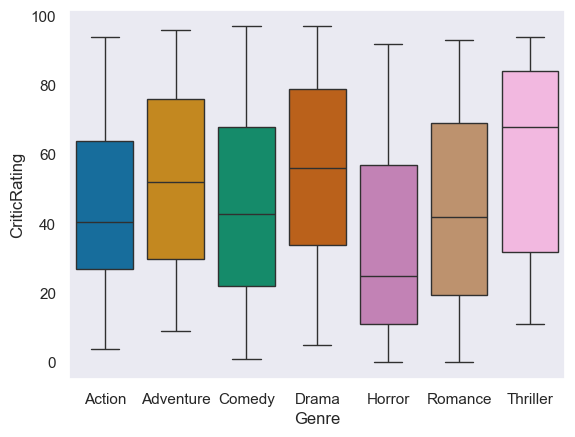

In [62]:
sns.set(style="dark")
w = sns.boxplot(data=movies, x='Genre', y = 'CriticRating',palette='colorblind')

### Violin plot

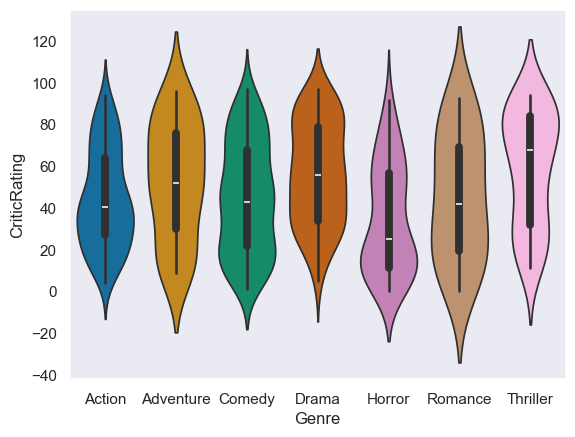

In [63]:
z = sns.violinplot(data=movies, x='Genre', y = 'CriticRating',palette='colorblind') 

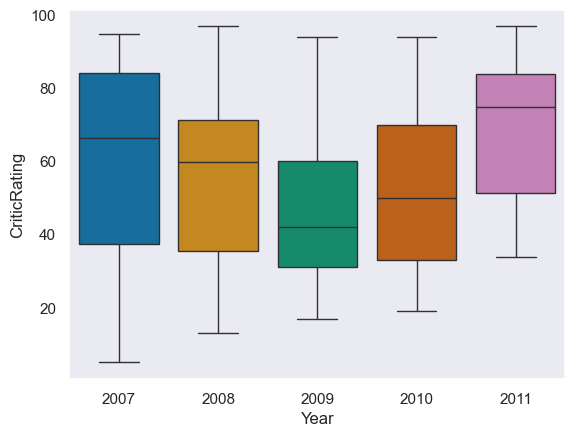

In [64]:
w1 = sns.boxplot(data=movies[movies.Genre == 'Drama'], x='Year', y = 'CriticRating',palette='colorblind')

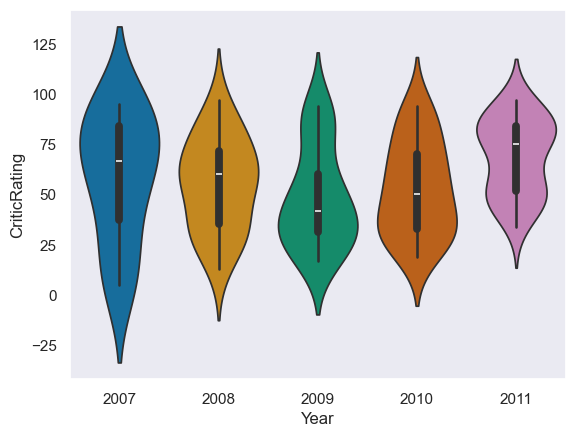

In [65]:
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y = 'CriticRating',palette='colorblind')

### Facetgrid

 Multi-plot grid for plotting conditional relationships.

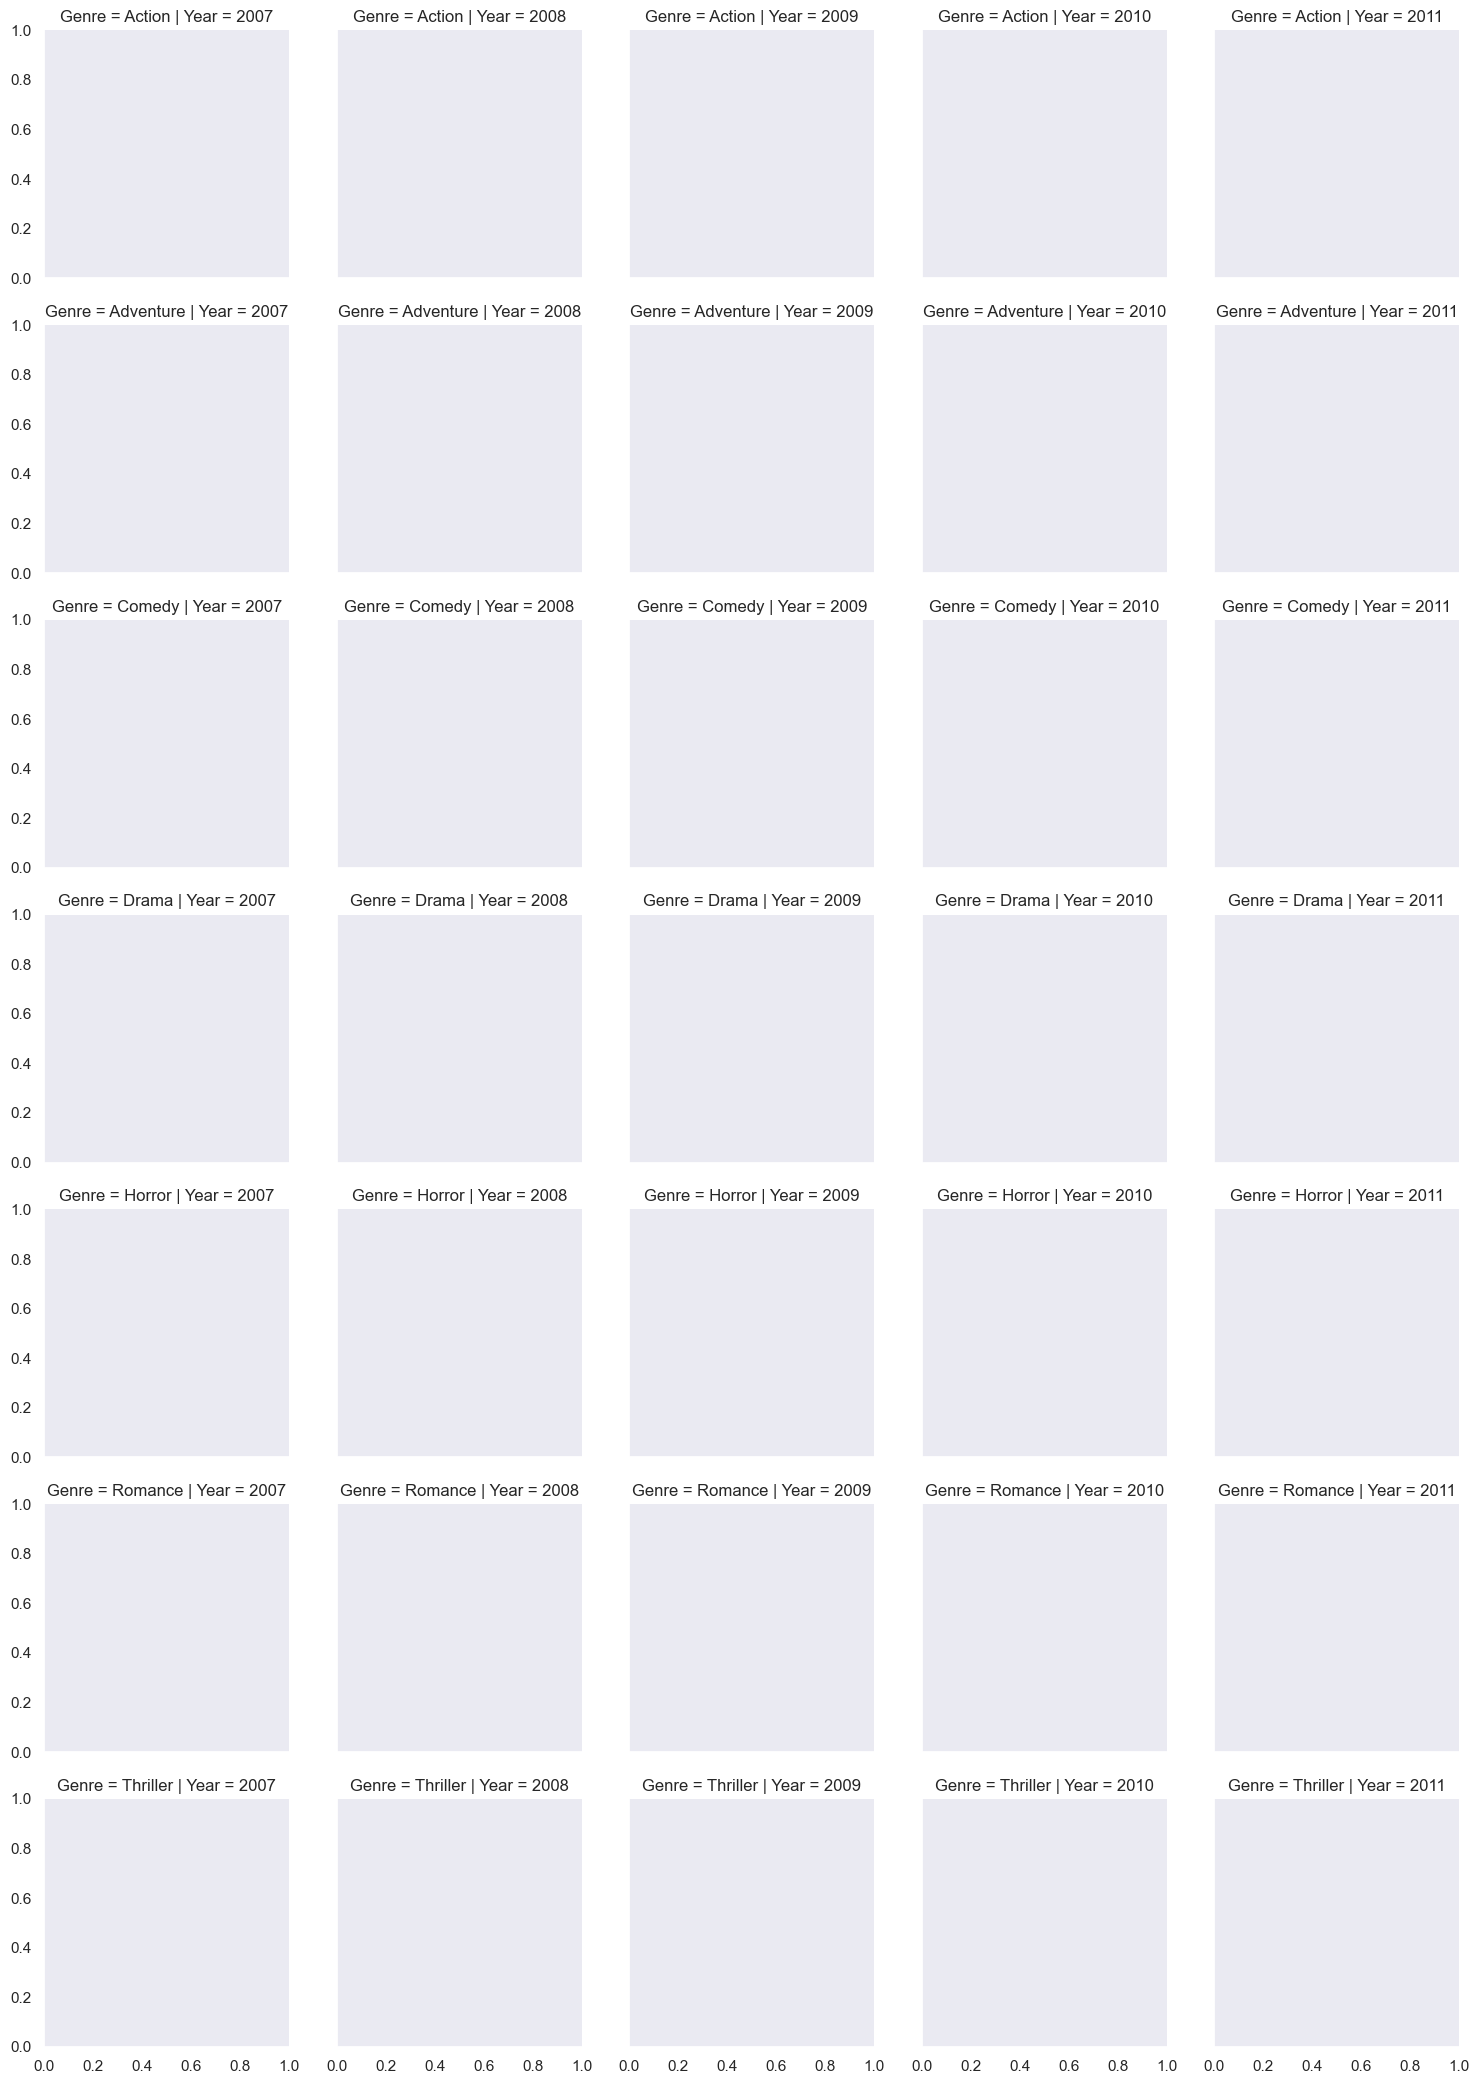

In [66]:
g =sns.FacetGrid (movies, row = 'Genre', col = 'Year', hue = 'Genre') #kind of subplots

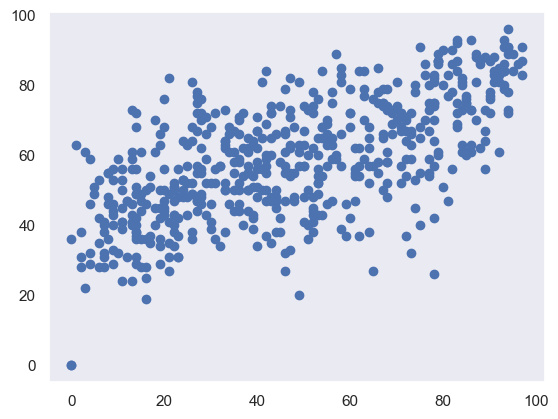

In [67]:
plt.scatter(movies.CriticRating,movies.AudienceRating)

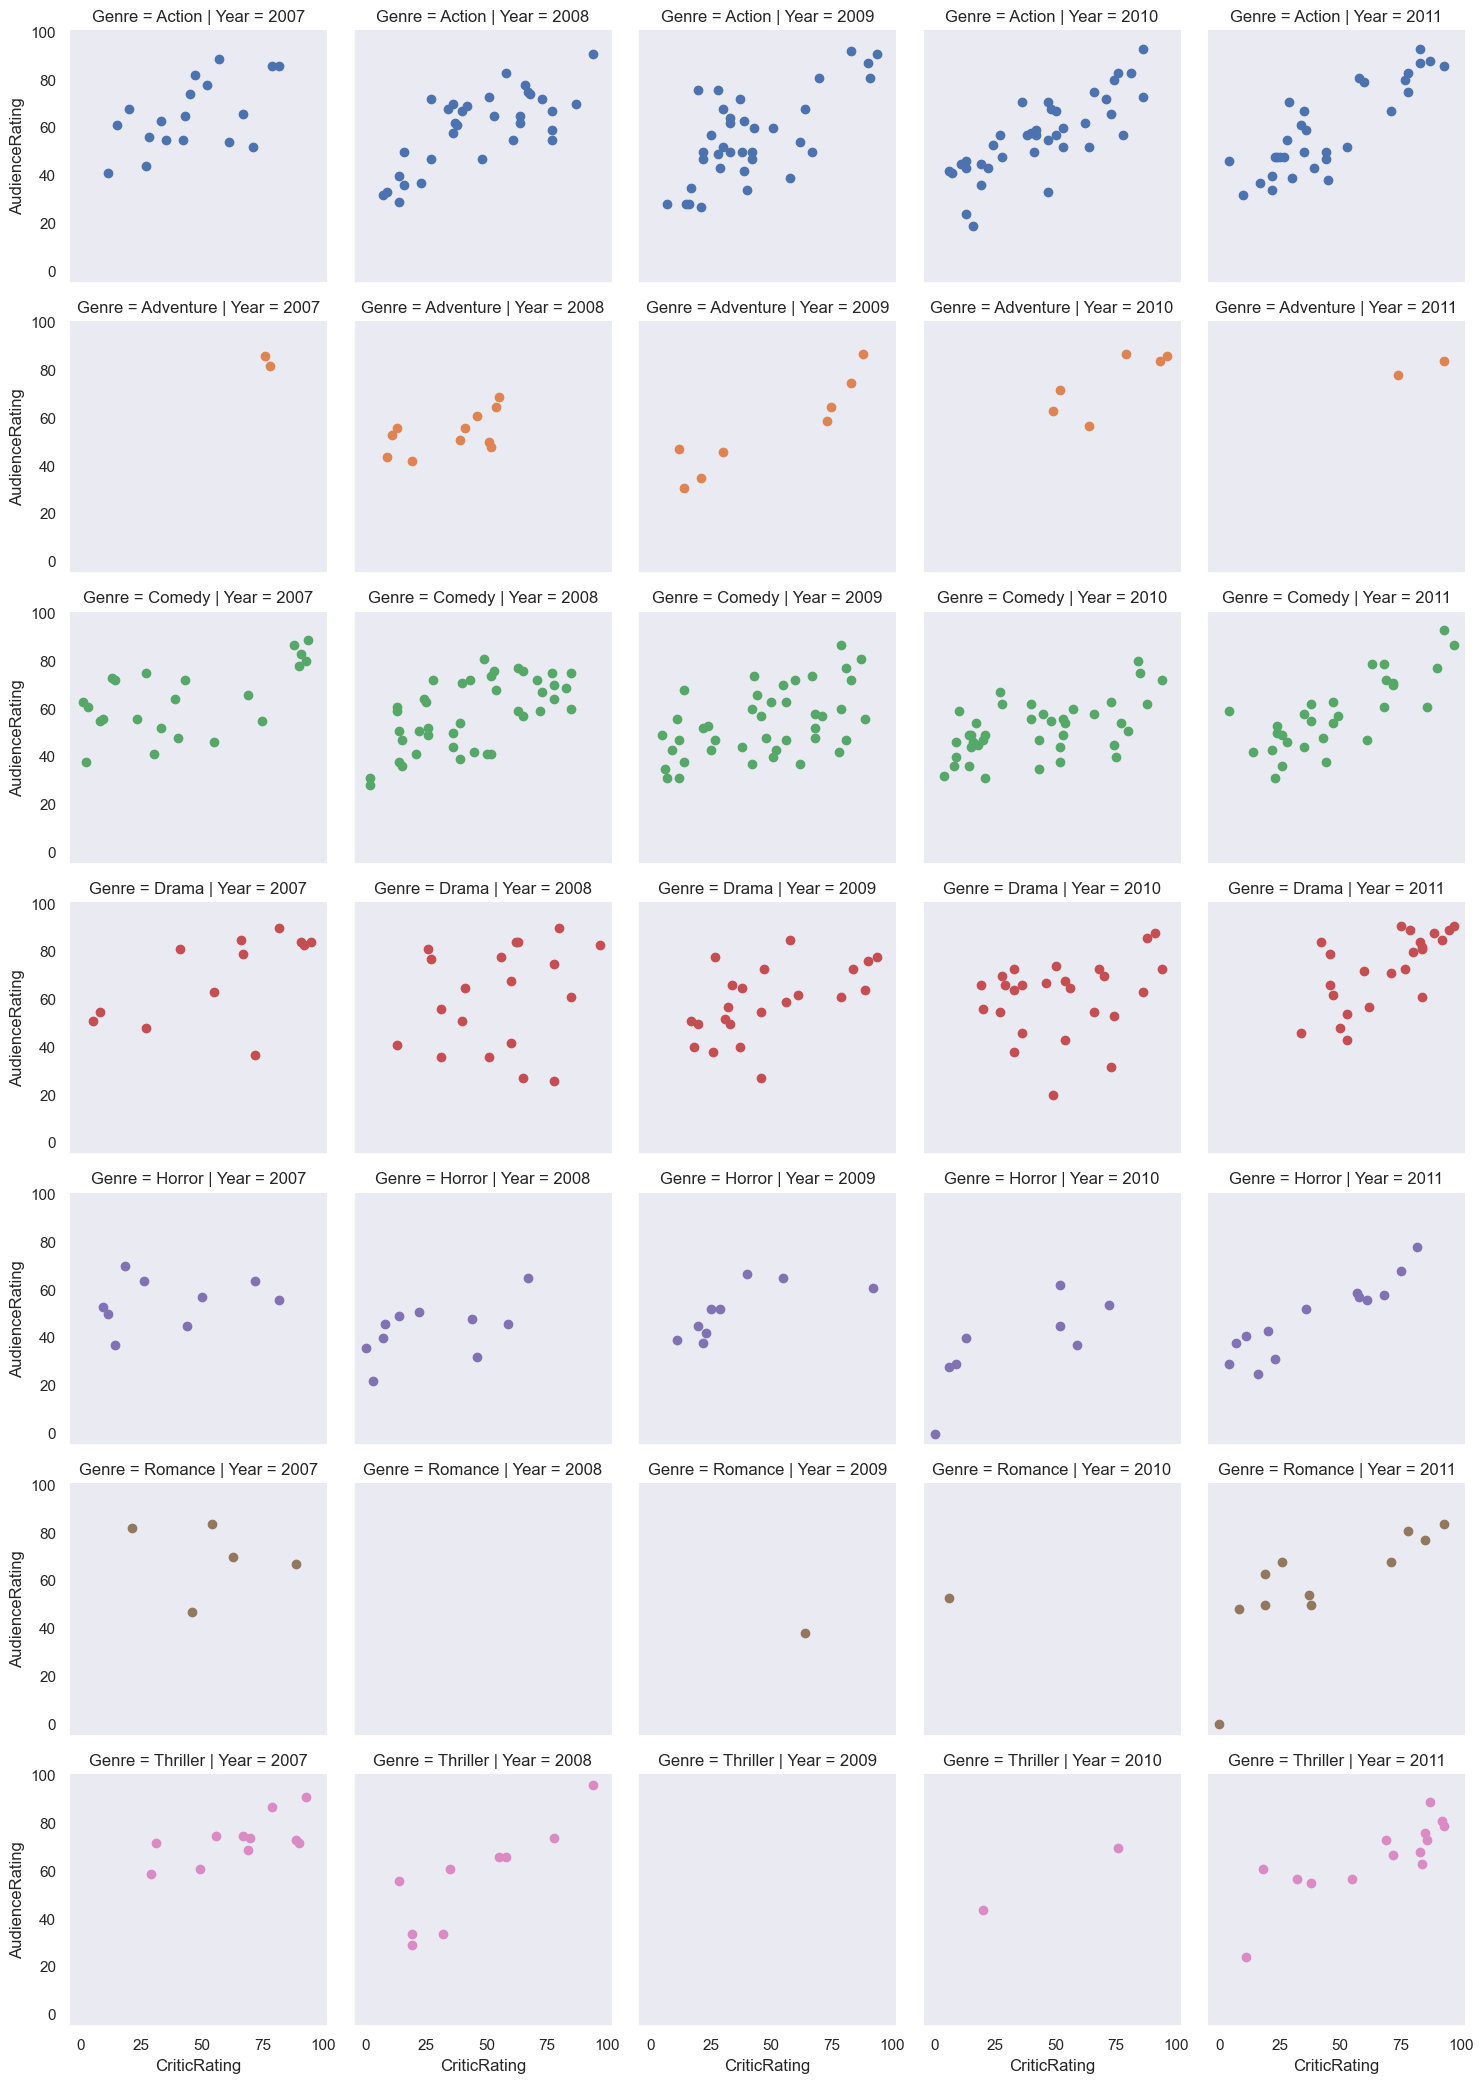

In [68]:
g =sns.FacetGrid (movies, row = 'Genre', col = 'Year', hue = 'Genre') 
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating' ) 

row='Genre': This specifies that the rows of the facet grid will be divided by the 'Genre' column. Each row will display data for a specific genre.

col='Year': This specifies that the columns of the facet grid will be divided by the 'Year' column. Each column will display data for a specific year.

'CriticRating': This indicates the x-axis variable (horizontal axis) for the scatter plot, which is the Critic Rating.

'AudienceRating': This indicates the y-axis variable (vertical axis) for the scatter plot, which is the Audience Rating. 
 
 this code creates a grid of scatter plots where each plot represents a combination of Genre and Year. Each data point in a plot shows the Critic Rating and Audience Rating for a particular movie. 
 
 The coloring based on Genre  helps visualize how the relationship between these ratings may differ across genres.

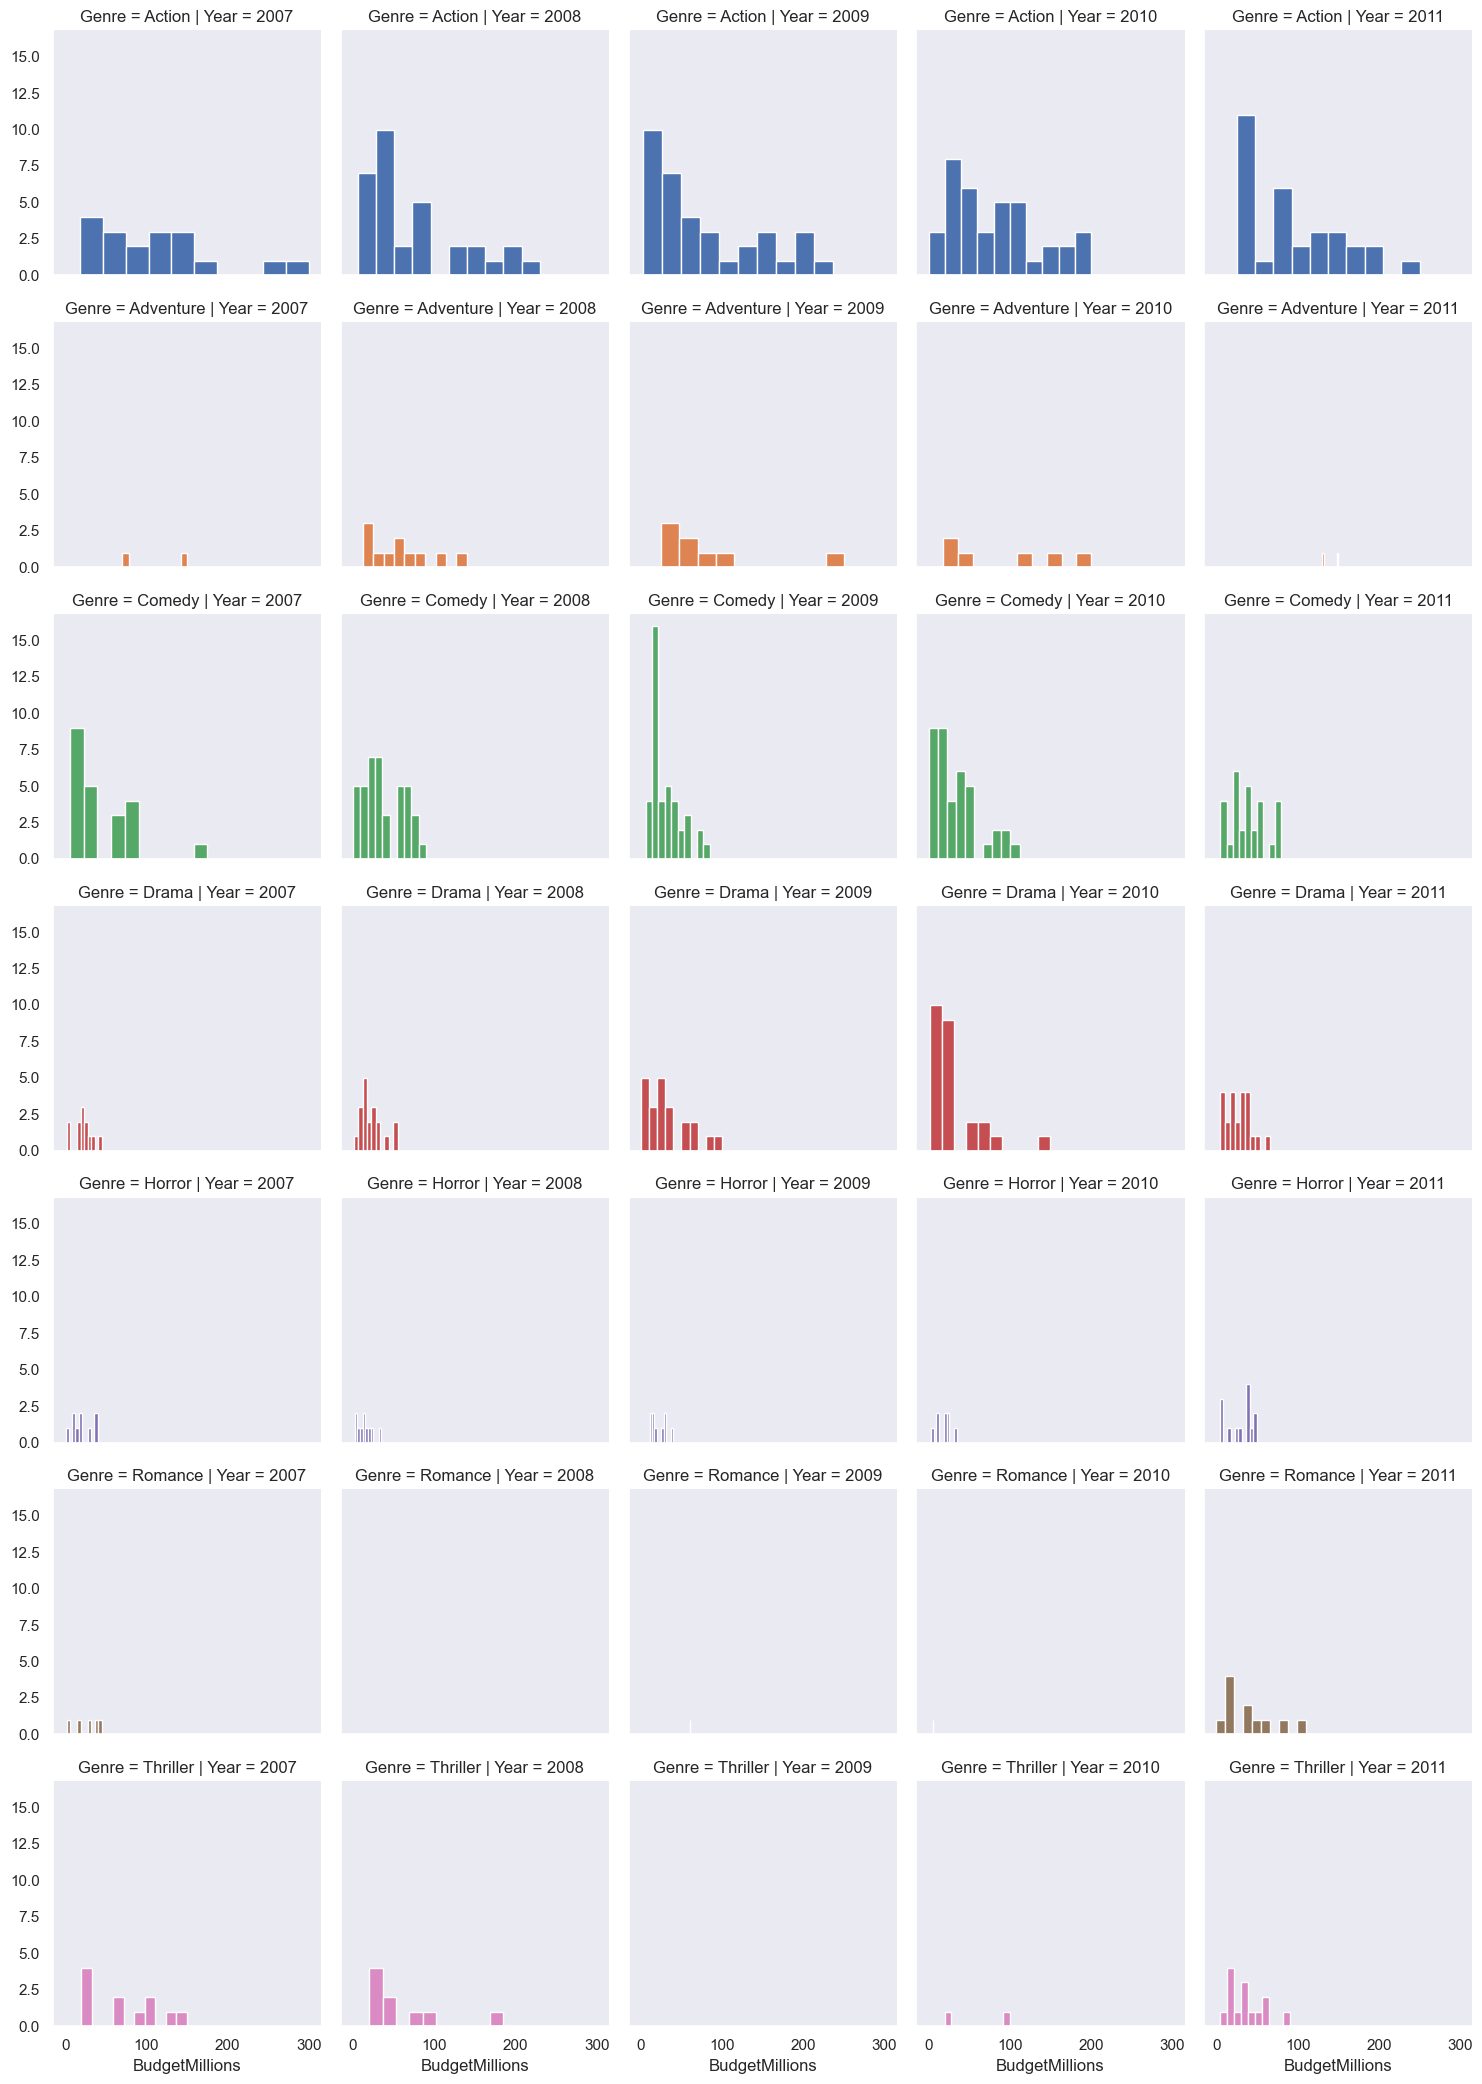

In [69]:
g =sns.FacetGrid (movies, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.hist, 'BudgetMillions') #scatterplots are mapped in facetgrid

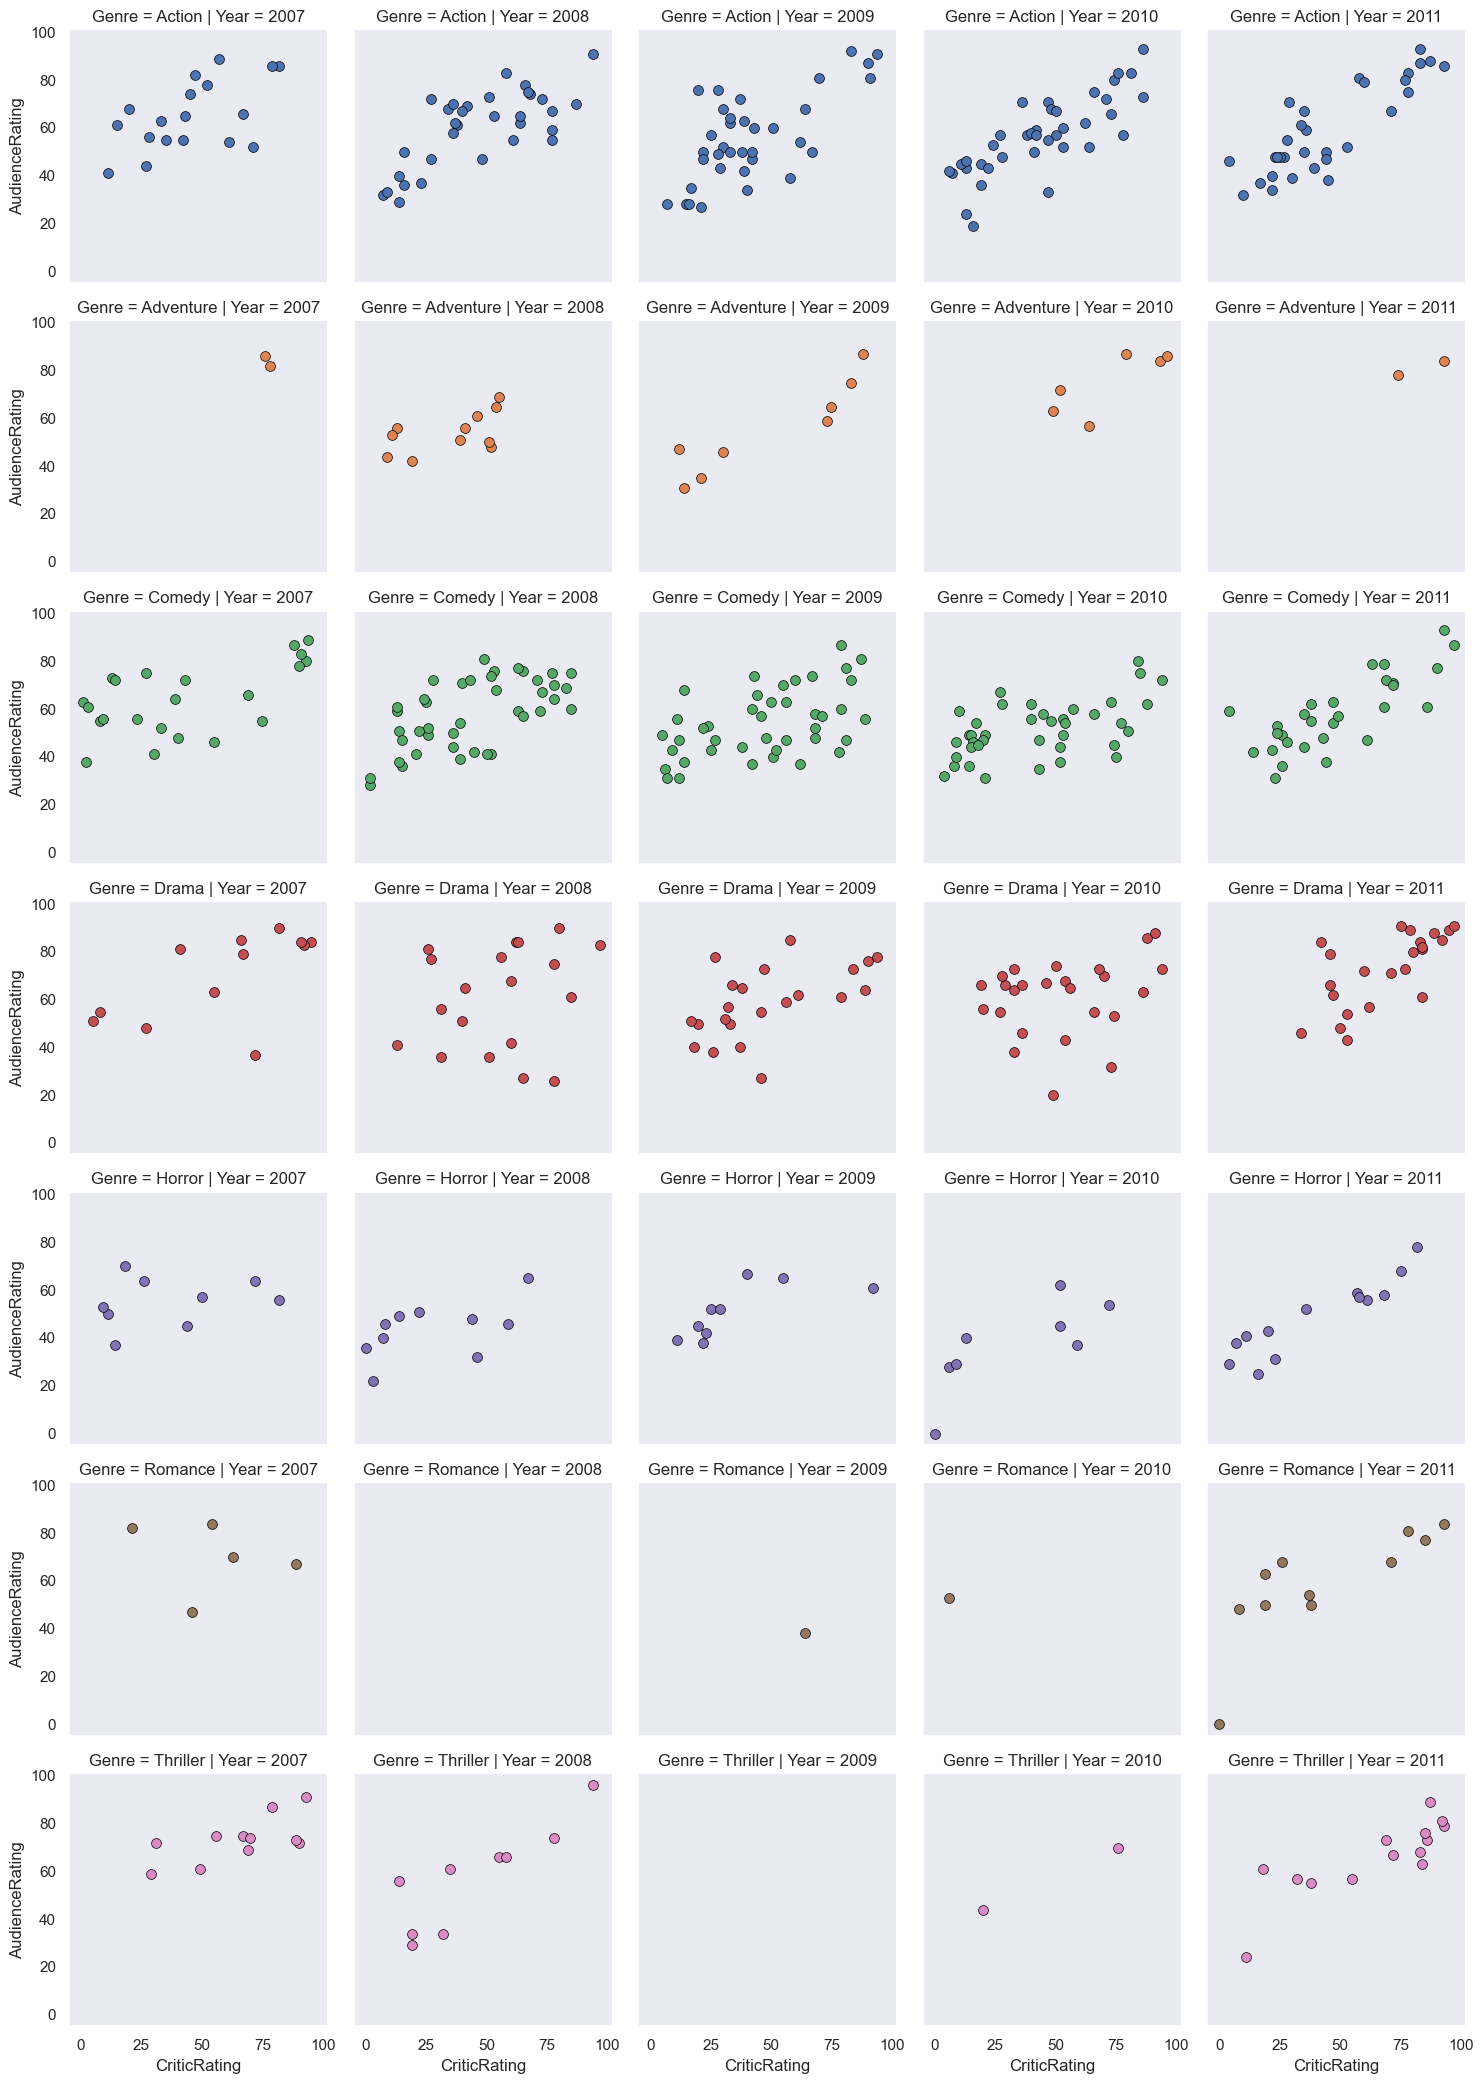

In [70]:


# FacetGrid with scatter plots
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

plt.show()

This line defines a dictionary named kws. Dictionaries are used to store key-value pairs.
s=50: This key-value pair sets the marker size for the scatter plots to 50. The s parameter in plt.scatter controls the size of the markers.

linewidth=0.5: This sets the line width of the markers' edges to 0.5. The linewidth parameter controls the thickness of the lines around the markers.

edgecolor='black': This sets the color of the markers' edges to black. The edgecolor parameter specifies the color for the border around the markers.

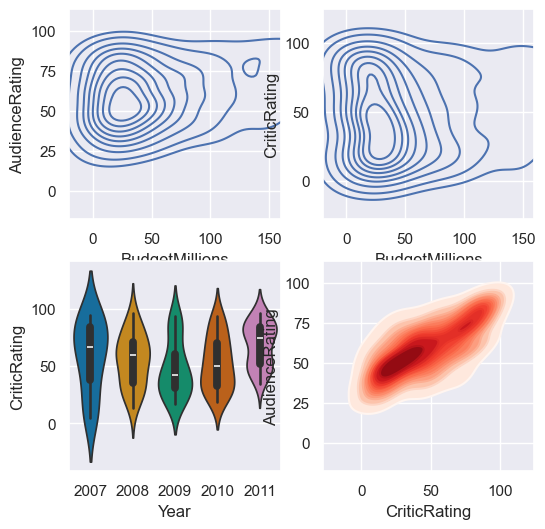

In [71]:
# python is not vectorize programming language
# Building dashboards (dashboard - combination of chats)

sns.set_style('darkgrid')
f, axes = plt.subplots (2,2, figsize = (6,6))

k1 = sns.kdeplot(x='BudgetMillions',y='AudienceRating',data=movies,ax=axes[0,0])
k2 = sns.kdeplot(x='BudgetMillions',y='CriticRating',data=movies,ax = axes[0,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

z = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y = 'CriticRating', ax=axes[1,0],palette='colorblind')

k4 = sns.kdeplot(x='CriticRating',y='AudienceRating',data=movies,shade = True,shade_lowest=False,cmap='Reds',ax=axes[1,1])
k4b = sns.kdeplot(x='CriticRating',y='AudienceRating',data=movies,cmap='Reds',ax = axes[1,1])

plt.show()

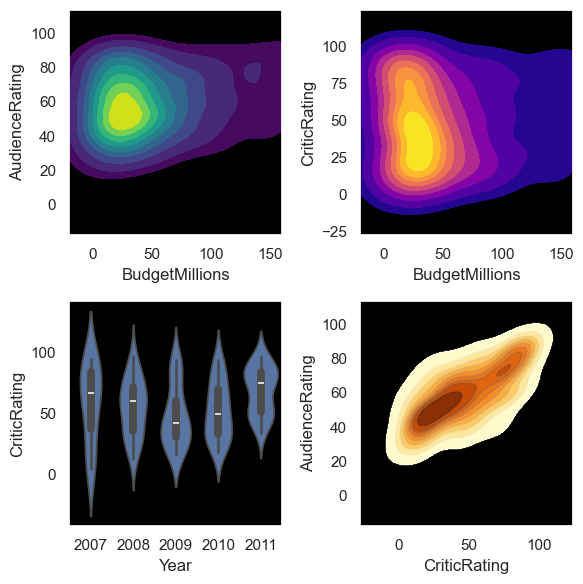

In [72]:
sns.set_style('dark', {'axes.facecolor': 'black'})

# Create a figure and subplots
f, axes = plt.subplots(2, 2, figsize=(6, 6))

# Budget Millions vs. Audience Rating (top-left)
k1 = sns.kdeplot(
    x='BudgetMillions', y='AudienceRating', data=movies, shade=True, cmap='viridis', ax=axes[0, 0]
)
k1.set(xlim=(-20, 160))  # Set x-axis limits for both plots

# Budget Millions vs. Critic Rating (top-right)
k2 = sns.kdeplot(
    x='BudgetMillions', y='CriticRating', data=movies, shade=True, cmap='plasma', ax=axes[0, 1]
)
k2.set(xlim=(-20, 160))

# Violin Plot for Drama Movies (bottom-left)
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating', ax=axes[1, 0])

# Critic Rating vs. Audience Rating (bottom-right) with highlight for high ratings
k4 = sns.kdeplot(
    x='CriticRating', y='AudienceRating', data=movies, shade=True, shade_lowest=False, cmap='YlOrBr', ax=axes[1, 1]
)
k4b = sns.kdeplot(x='CriticRating', y='AudienceRating', data=movies, cmap='Greys', alpha=0.3, ax=axes[1, 1])  # Add a gray background

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [73]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [89]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [92]:
movies['Year'].astype('int64')           

0      2009
1      2008
2      2009
3      2010
4      2009
       ... 
554    2011
555    2009
556    2007
557    2009
558    2011
Name: Year, Length: 559, dtype: int64

In [100]:
X = movies.drop(['Film', 'Genre', 'AudienceRating','Year'], axis=1)
y = movies['AudienceRating']

In [101]:
X.head()

,CriticRating,BudgetMillions
0,87,8
1,9,105
2,30,20
3,93,18
4,55,20


In [102]:
y.head()

0    81
1    44
2    52
3    84
4    70
Name: AudienceRating, dtype: int64

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [105]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*1000))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*1000, 2)


In [106]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

XGBR = XGBRegressor(n_estimators=100, random_state=1)
XGBR.fit(x_train, y_train)
xgb_preds = XGBR.predict(x_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(x_train, y_train)
lgbm_preds = LGBMR.predict(x_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 447, number of used features: 2
[LightGBM] [Info] Start training from score 57.293065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [107]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
XGBScore = evaluate_model(y_test, xgb_preds, "EXTENDED GRADIENT BOOSTING")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
LGBScore = evaluate_model(y_test, lgbm_preds, "LIGHT GRADIENT BOOSTING")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = 457.41%
Mean Squared Error = 11.77

Model:  RANDOM FOREST
Accuracy = 378.95%
Mean Squared Error = 12.59

Model:  DECEISION TREE
Accuracy = -38.28%
Mean Squared Error = 16.28

Model:  EXTENDED GRADIENT BOOSTING
Accuracy = 228.05%
Mean Squared Error = 14.04

Model:  GRADIENT BOOSTING
Accuracy = 494.41%
Mean Squared Error = 11.36

Model:  LIGHT GRADIENT BOOSTING
Accuracy = 436.84%
Mean Squared Error = 11.99

Model:  K NEAREST NEIGHBORS
Accuracy = 330.22%
Mean Squared Error = 13.07



In [109]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "Extended Gradient Boosting", "Light Gradient Boosting",  "K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, GBScore, XGBScore, LGBScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending=False)

,MODELS,SCORES
3,Gradient Boosting,494.41
0,Linear Regression,457.41
5,Light Gradient Boosting,436.84
1,Random Forest,378.95
6,K Nearest Neighbors,330.22
4,Extended Gradient Boosting,228.05
2,Decision Tree,-38.28
